In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# create sample cluster data
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

df = pd.DataFrame(data=X, columns=['feature1', 'feature2'])
df['target'] = y

# estimate_bandwidth() - calculate best bandwidth
best_bandwidth = estimate_bandwidth(X)
print("best_bandwith %f"%(best_bandwidth))

# create model with best bandwidth
meanshift= MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)

df['meanshift_label']  = cluster_labels
print(df.groupby('target')['meanshift_label'].value_counts())

best_bandwith 1.815848
target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


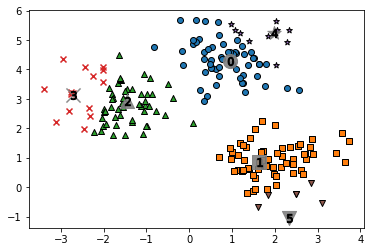

In [12]:
meanshift= MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)

df['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*', 'v', 'D','X','P']
# plot clusters and modes
for label in unique_labels:
    label_cluster = df[df['meanshift_label']==label]
    center_x_y = centers[label]
    
    plt.scatter(x=label_cluster['feature1'], y=label_cluster['feature2'], edgecolor='k', marker=markers[label] )
   
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
plt.show()

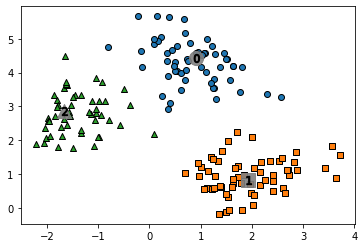

In [13]:
meanshift= MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*', 'v', 'D','X','P']
# plot clusters and modes
for label in unique_labels:
    label_cluster = df[df['meanshift_label']==label]
    center_x_y = centers[label]
    
    plt.scatter(x=label_cluster['feature1'], y=label_cluster['feature2'], edgecolor='k', marker=markers[label] )
   
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
plt.show()